In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:


# Read the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMites/HR-Employee-Attrition.tsv', sep='\t',names=['Age','Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])

data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [3]:
data = data.drop(0,axis=0)

In [4]:
data.reset_index(inplace=True,drop=True)

In [5]:
data.head(pd.set_option('display.max_columns',None)).T

Output hidden; open in https://colab.research.google.com to view.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   object
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   object
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   object
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   object
 9   EmployeeNumber            1470 non-null   object
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   object
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [7]:
data['Age'] = data['Age'].astype('int')

In [8]:

for column in data.columns:
    if all(data[column].astype(str).str.isnumeric()):
        data[column] = data[column].astype('int64')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
data.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [14]:
for column in data.columns:
  a = data[column].nunique()
  if a == 1:
    data = data.drop(column,axis=1)
    print(f"{column} ----> {a}")

EmployeeCount ----> 1
Over18 ----> 1
StandardHours ----> 1


In [15]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [17]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 26.4 MB/s eta 0:00:00


In [18]:
import sweetviz as sv

my_report = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [19]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
for column in data.columns:
  if data[column].nunique() <= 10:
    print(column)

Attrition
BusinessTravel
Department
Education
EducationField
EnvironmentSatisfaction
Gender
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
OverTime
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TrainingTimesLastYear
WorkLifeBalance


In [21]:
data1 = data[['Attrition',
            'BusinessTravel',
            'Department',
            'Education',
            'EducationField',
            'EnvironmentSatisfaction',
            'Gender',
            'JobInvolvement',
            'JobLevel',
            'JobRole',
            'JobSatisfaction',
            'MaritalStatus',
            'NumCompaniesWorked',
            'OverTime',
            'PerformanceRating',
            'RelationshipSatisfaction',
            'StockOptionLevel',
            'TrainingTimesLastYear',
            'WorkLifeBalance']]

In [22]:
data1.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,8,Yes,3,1,0,0,1
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,1,No,4,4,1,3,3
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,6,Yes,3,2,0,3,3
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,1,Yes,3,3,0,3,3
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,9,No,3,4,1,3,3


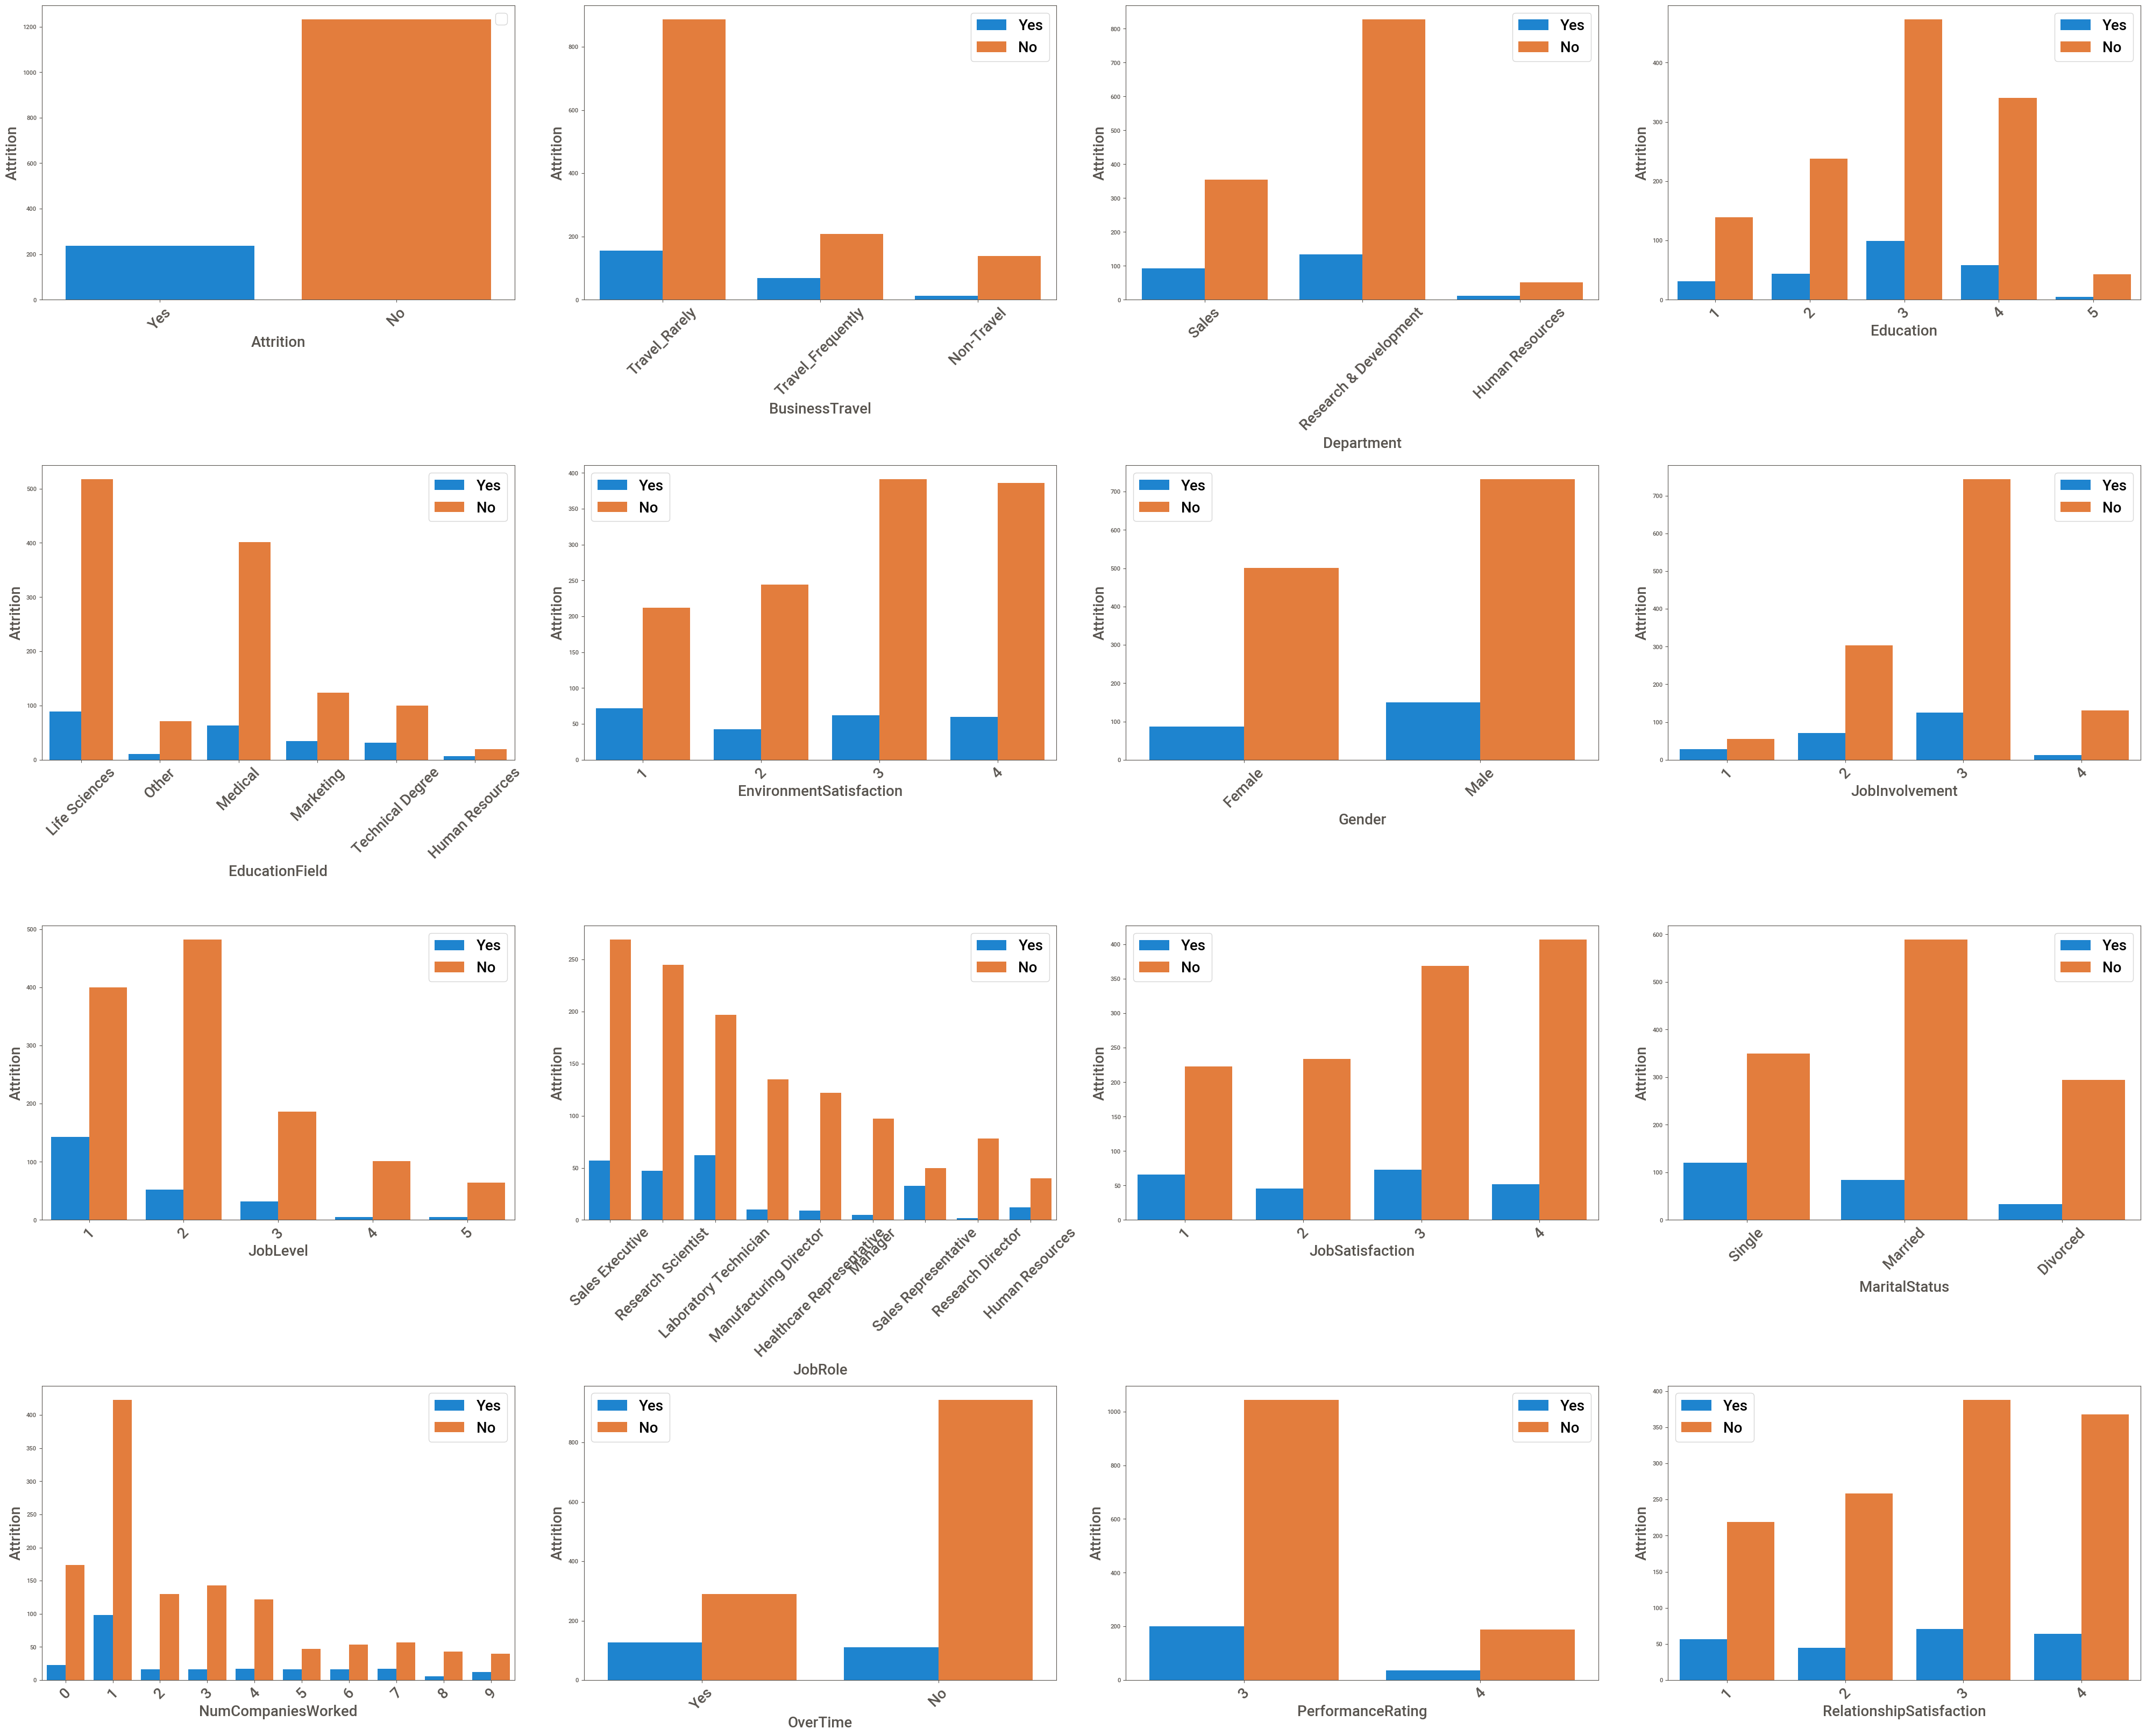

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of the hue variable
hue_order = ['Yes', 'No']  # Example order, adjust as per your data

plt.figure(figsize=(40, 40))
plotnumber = 1

for column in data1.columns:
    if plotnumber <= 16:
        ax = plt.subplot(5, 4, plotnumber)
        sns.countplot(x=data1[column], hue=data1['Attrition'], hue_order=hue_order)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Attrition', fontsize=20)
        plt.xticks(rotation=45, fontsize=20)
        plt.legend(fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [24]:
Data2 = pd.DataFrame()

for column in data.columns:
    if data[column].nunique() > 10:
        Data2[column] = data[column].copy()

In [25]:
Data2.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,94,5993,19479,11,8,6,4,0,5
1,49,279,8,2,61,5130,24907,23,10,10,7,1,7
2,37,1373,2,4,92,2090,2396,15,7,0,0,0,0
3,33,1392,3,5,56,2909,23159,11,8,8,7,3,0
4,27,591,2,7,40,3468,16632,12,6,2,2,2,2


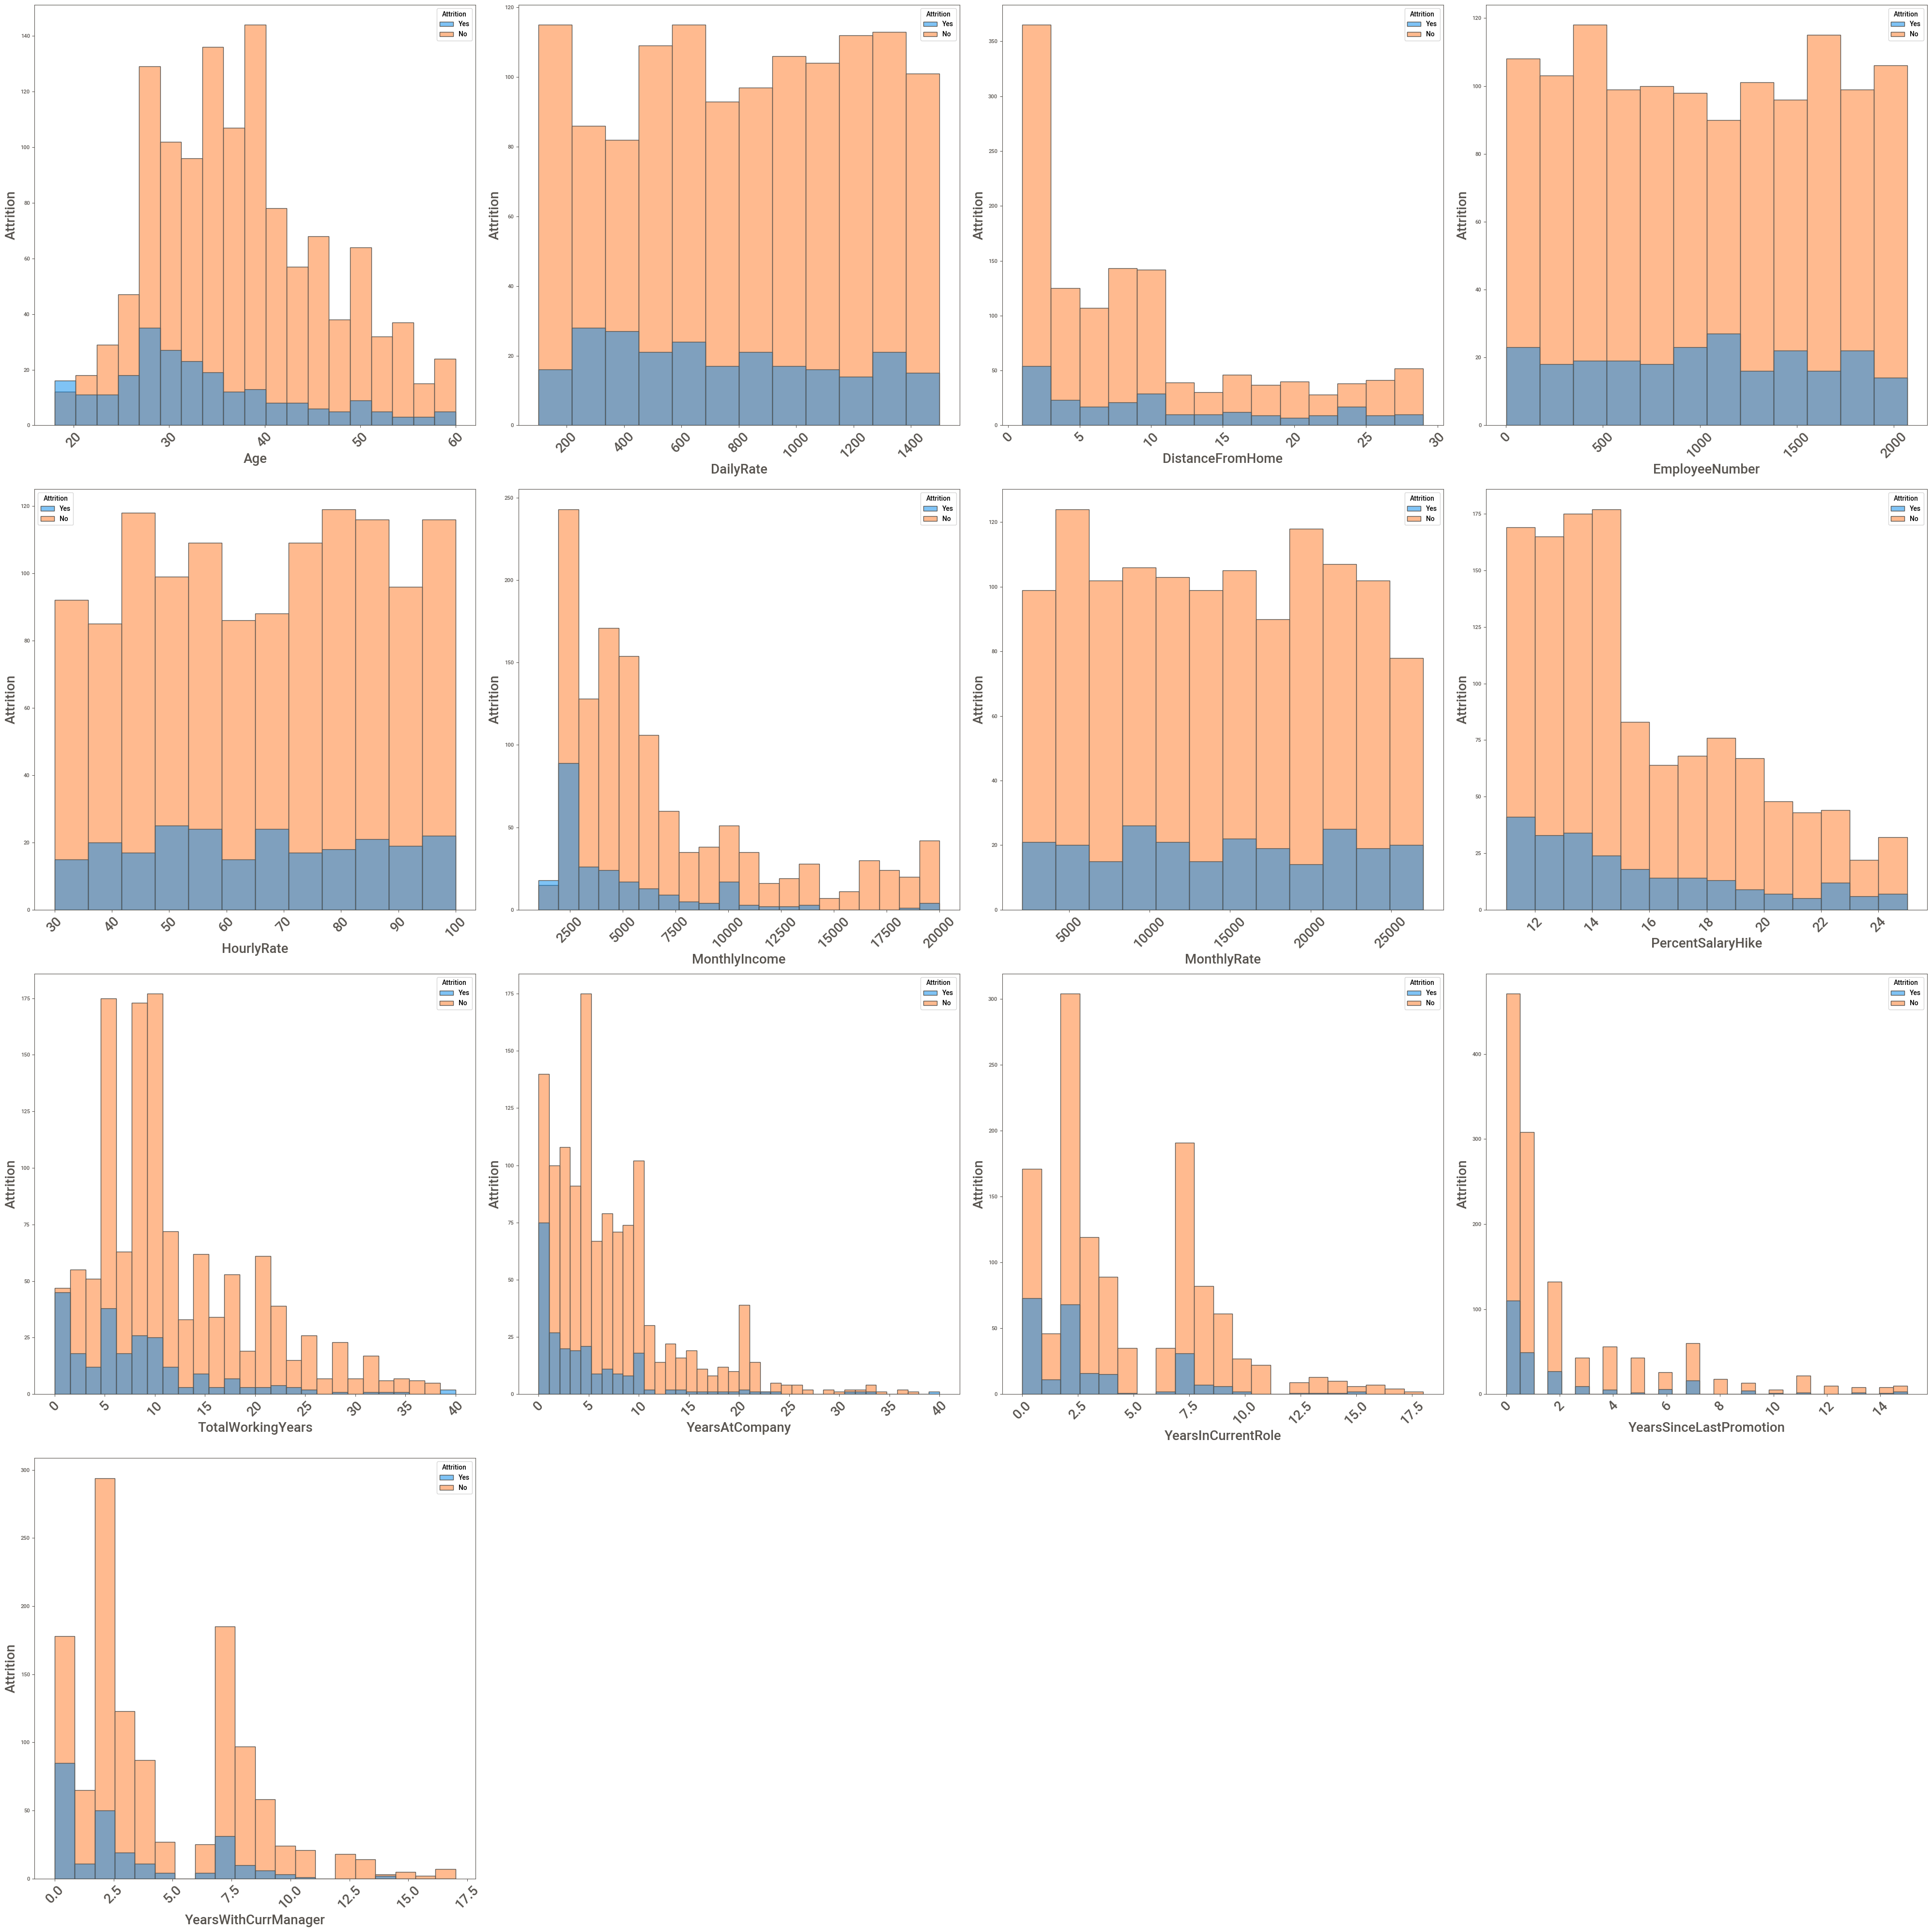

In [26]:


plt.figure(figsize=(40, 40))
plotnumber = 1

for column in Data2.columns:
    if plotnumber <= 14:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x=Data2[column], hue=data['Attrition'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Attrition', fontsize=20)
        plt.xticks(rotation=45, fontsize=20)


    plotnumber += 1

plt.tight_layout()
plt.show()


In [27]:
data = data.drop('EmployeeNumber',axis=1)

In [28]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [29]:
data['Attrition'] = data['Attrition'].map({'Yes':1, 'No':0})

In [30]:
data['BusinessTravel'] = data['BusinessTravel'].map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})

In [31]:
data['Department'] = data['Department'].map({'Sales':1, 'Research & Development':2, 'Human Resources':0})

In [32]:
data['EducationField'] = data['EducationField'].map({'Life Sciences':3, 'Other':0, 'Medical':4, 'Marketing':2,
                                                      'Technical Degree':5, 'Human Resources':1})

In [33]:
data['Gender'] = pd.get_dummies(data['Gender'],drop_first=True)

In [34]:
data['JobRole'] = data['JobRole'].map({'Sales Executive':8, 'Research Scientist':7, 'Laboratory Technician':6,
                                        'Manufacturing Director':5, 'Healthcare Representative':4, 'Manager':3,
                                        'Sales Representative':2, 'Research Director':1, 'Human Resources':0})

In [35]:
data['MaritalStatus'] = data['MaritalStatus'].map({'Single':2, 'Married':1, 'Divorced':0})

In [36]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['OverTime'] = label.fit_transform(data['OverTime'])

In [37]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,3,2,0,94,3,2,8,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,3,3,1,61,2,2,7,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,0,4,1,92,2,1,6,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,3,4,0,56,3,1,7,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,1,40,3,1,6,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [38]:
data.duplicated().sum()

0

In [39]:
Data2.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,94,5993,19479,11,8,6,4,0,5
1,49,279,8,2,61,5130,24907,23,10,10,7,1,7
2,37,1373,2,4,92,2090,2396,15,7,0,0,0,0
3,33,1392,3,5,56,2909,23159,11,8,8,7,3,0
4,27,591,2,7,40,3468,16632,12,6,2,2,2,2


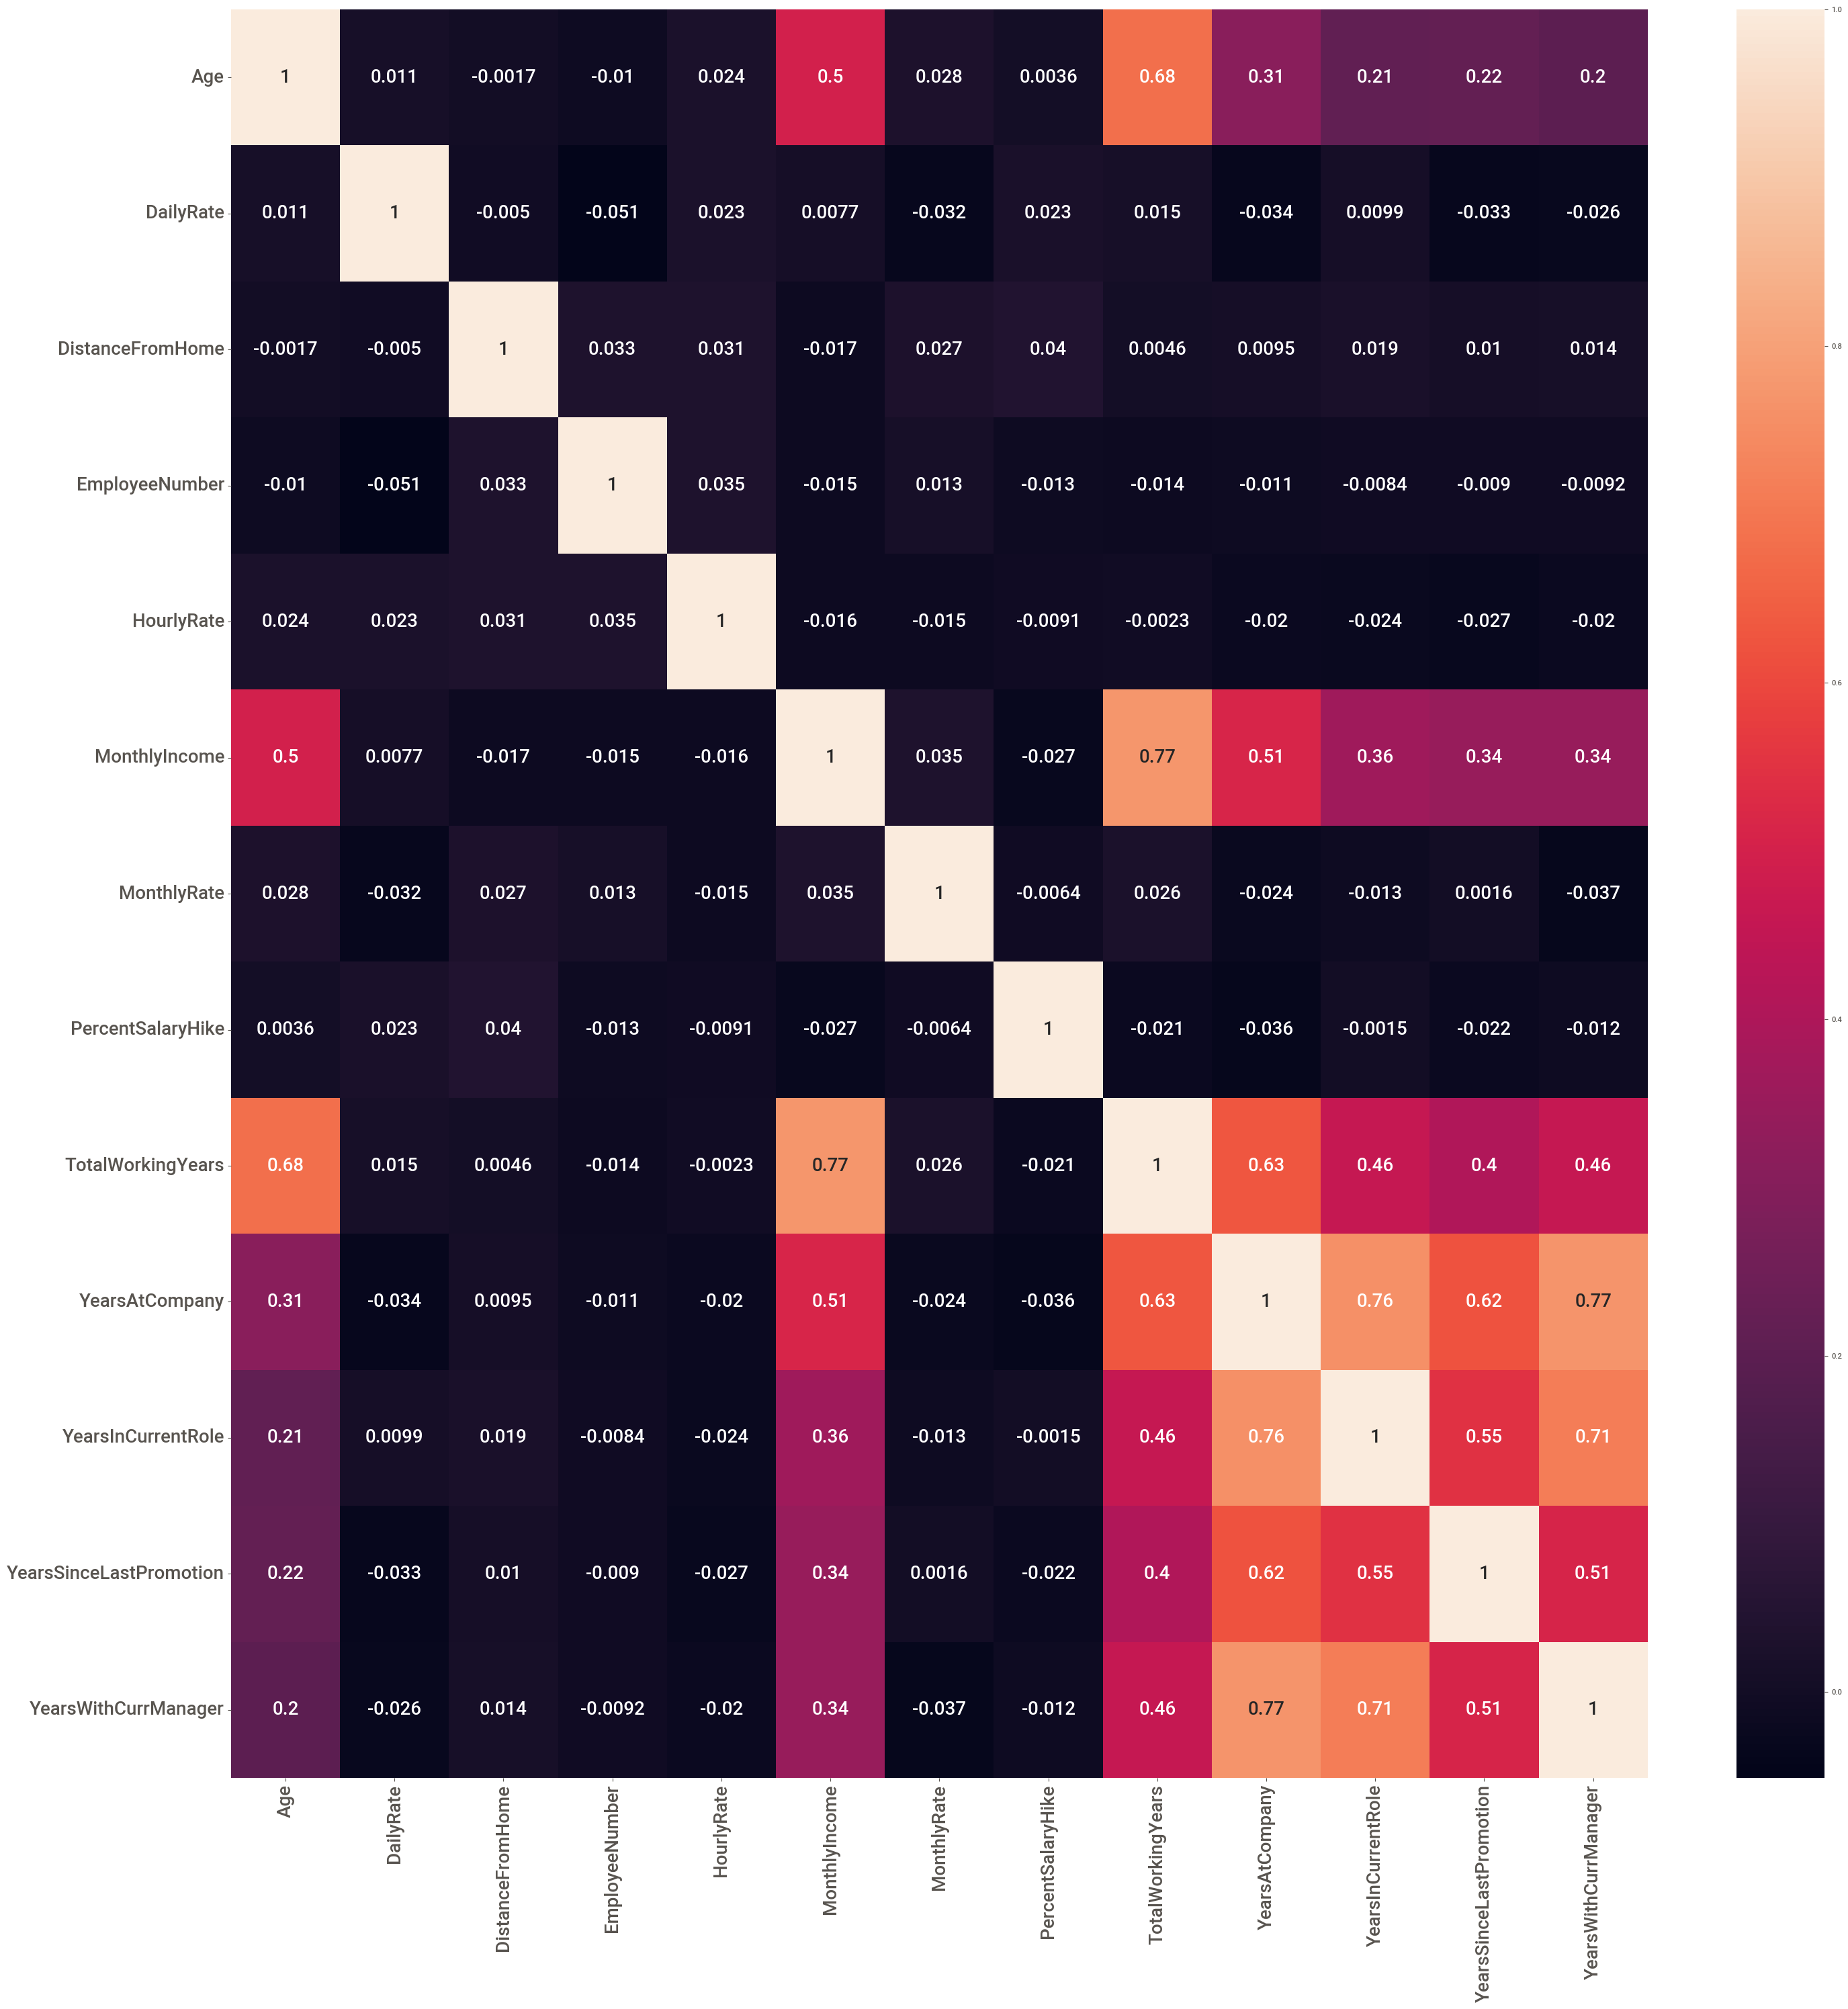

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(Data2.corr(), annot=True, annot_kws={"size": 20})  # Adjust the size as needed

# Adjust font size and rotation of x-labels and y-labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20, rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20, rotation=0)

plt.tight_layout()
plt.show()



In [41]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,3,2,0,94,3,2,8,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,3,3,1,61,2,2,7,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,0,4,1,92,2,1,6,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,3,4,0,56,3,1,7,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,1,40,3,1,6,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [42]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [43]:
X = data.drop('Attrition',axis = 1)
y = data['Attrition']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [45]:
from collections import Counter
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_train_SM,y_train_SM = SM.fit_resample(X_train,y_train)

In [46]:
print(Counter(y_train_SM))

Counter({0: 978, 1: 978})


In [47]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,min_samples_split=3,
                            splitter='random')
DT.fit(X_train_SM,y_train_SM)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [48]:
y_preds = DT.predict(X_test)

In [49]:
y_train_preds = DT.predict(X_train_SM)

In [51]:
from sklearn.metrics import classification_report
# Training Score
print(classification_report(y_train_SM,y_train_preds))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       978
           1       0.94      0.97      0.95       978

    accuracy                           0.95      1956
   macro avg       0.95      0.95      0.95      1956
weighted avg       0.95      0.95      0.95      1956



In [52]:
# Testing Score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       255
           1       0.27      0.44      0.33        39

    accuracy                           0.77       294
   macro avg       0.59      0.63      0.60       294
weighted avg       0.82      0.77      0.79       294



In [53]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1400,min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=30)
clf.fit(X_train_SM,y_train_SM)


RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=1400)

In [54]:
y_p = clf.predict(X_test)

In [55]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.57      0.33      0.42        39

    accuracy                           0.88       294
   macro avg       0.73      0.65      0.68       294
weighted avg       0.86      0.88      0.86       294



In [56]:

from sklearn.metrics import f1_score
f1_score(y_test,y_p)

0.4193548387096774